In [19]:
import numpy as np
import pandas as pd

In [20]:
! pip install kaggle

In [21]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [22]:
! cp kaggle.json ~/.kaggle/

In [23]:
! chmod 600 ~/.kaggle/kaggle.json

In [24]:
! kaggle competitions download -c web-traffic-time-series-forecasting

 97% 98.0M/101M [00:00<00:00, 132MB/s]
100% 101M/101M [00:00<00:00, 159MB/s] 
100% 150M/150M [00:01<00:00, 154MB/s]
100% 150M/150M [00:01<00:00, 134MB/s]
 97% 64.0M/66.0M [00:01<00:00, 57.9MB/s]
100% 66.0M/66.0M [00:01<00:00, 47.6MB/s]
 82% 79.0M/96.0M [00:00<00:00, 138MB/s]
100% 96.0M/96.0M [00:00<00:00, 151MB/s]
 84% 57.0M/68.2M [00:00<00:00, 95.4MB/s]
100% 68.2M/68.2M [00:00<00:00, 115MB/s] 
 87% 89.0M/102M [00:01<00:00, 77.4MB/s]
100% 102M/102M [00:01<00:00, 96.2MB/s] 


In [25]:
! unzip train_1.csv

Archive:  train_1.csv.zip
  inflating: train_1.csv             


In [26]:
train = pd.read_csv('train_1.csv')
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,...,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,...,24.0,14.0,11.0,204.0,14.0,45.0,33.0,28.0,18.0,14.0,47.0,15.0,14.0,18.0,20.0,14.0,16.0,14.0,20.0,60.0,22.0,15.0,17.0,19.0,18.0,21.0,21.0,47.0,65.0,17.0,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,...,14.0,15.0,15.0,11.0,20.0,13.0,19.0,621.0,57.0,17.0,23.0,19.0,21.0,47.0,28.0,22.0,22.0,65.0,27.0,17.0,17.0,13.0,9.0,18.0,22.0,17.0,15.0,22.0,23.0,19.0,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,...,9.0,3.0,5.0,4.0,0.0,1.0,4.0,5.0,8.0,8.0,1.0,1.0,2.0,5.0,3.0,3.0,3.0,7.0,3.0,9.0,8.0,3.0,210.0,5.0,4.0,6.0,2.0,2.0,4.0,3.0,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,...,7.0,10.0,7.0,10.0,14.0,17.0,11.0,9.0,11.0,5.0,10.0,8.0,17.0,13.0,23.0,40.0,16.0,17.0,41.0,17.0,8.0,9.0,18.0,12.0,12.0,18.0,13.0,18.0,23.0,10.0,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,13.0,15.0,14.0,16.0,9.0,178.0,64.0,12.0,10.0,11.0,6.0,8.0,7.0,9.0,8.0,5.0,11.0,8.0,4.0,15.0,5.0,8.0,8.0,6.0,7.0,15.0,4.0,11.0,7.0,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [27]:
train = train.fillna(0)
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,...,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,...,24.0,14.0,11.0,204.0,14.0,45.0,33.0,28.0,18.0,14.0,47.0,15.0,14.0,18.0,20.0,14.0,16.0,14.0,20.0,60.0,22.0,15.0,17.0,19.0,18.0,21.0,21.0,47.0,65.0,17.0,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,...,14.0,15.0,15.0,11.0,20.0,13.0,19.0,621.0,57.0,17.0,23.0,19.0,21.0,47.0,28.0,22.0,22.0,65.0,27.0,17.0,17.0,13.0,9.0,18.0,22.0,17.0,15.0,22.0,23.0,19.0,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,...,9.0,3.0,5.0,4.0,0.0,1.0,4.0,5.0,8.0,8.0,1.0,1.0,2.0,5.0,3.0,3.0,3.0,7.0,3.0,9.0,8.0,3.0,210.0,5.0,4.0,6.0,2.0,2.0,4.0,3.0,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,...,7.0,10.0,7.0,10.0,14.0,17.0,11.0,9.0,11.0,5.0,10.0,8.0,17.0,13.0,23.0,40.0,16.0,17.0,41.0,17.0,8.0,9.0,18.0,12.0,12.0,18.0,13.0,18.0,23.0,10.0,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,13.0,15.0,14.0,16.0,9.0,178.0,64.0,12.0,10.0,11.0,6.0,8.0,7.0,9.0,8.0,5.0,11.0,8.0,4.0,15.0,5.0,8.0,8.0,6.0,7.0,15.0,4.0,11.0,7.0,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [28]:
def parse_page(page):
  x = page.split('_')
  return ' '.join(x[:-3]), x[-3], x[-2], x[-1]

In [29]:
parse_page(train.Page[0])

('2NE1', 'zh.wikipedia.org', 'all-access', 'spider')

In [30]:
df = pd.DataFrame(list(train.Page.apply(parse_page)))

In [31]:
df.columns = ['Subject','Sub_Page','Access','Agent']
df.head(3)

,Subject,Sub_Page,Access,Agent
0,2NE1,zh.wikipedia.org,all-access,spider
1,2PM,zh.wikipedia.org,all-access,spider
2,3C,zh.wikipedia.org,all-access,spider


In [32]:
train = pd.concat([df,train],axis=1)

In [33]:
train = train.drop(['Page'], axis=1)

In [34]:
train.head(200)

,Subject,Sub_Page,Access,Agent,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,...,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1,zh.wikipedia.org,all-access,spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,...,24.0,14.0,11.0,204.0,14.0,45.0,33.0,28.0,18.0,14.0,47.0,15.0,14.0,18.0,20.0,14.0,16.0,14.0,20.0,60.0,22.0,15.0,17.0,19.0,18.0,21.0,21.0,47.0,65.0,17.0,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM,zh.wikipedia.org,all-access,spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,...,14.0,15.0,15.0,11.0,20.0,13.0,19.0,621.0,57.0,17.0,23.0,19.0,21.0,47.0,28.0,22.0,22.0,65.0,27.0,17.0,17.0,13.0,9.0,18.0,22.0,17.0,15.0,22.0,23.0,19.0,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C,zh.wikipedia.org,all-access,spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,...,9.0,3.0,5.0,4.0,0.0,1.0,4.0,5.0,8.0,8.0,1.0,1.0,2.0,5.0,3.0,3.0,3.0,7.0,3.0,9.0,8.0,3.0,210.0,5.0,4.0,6.0,2.0,2.0,4.0,3.0,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute,zh.wikipedia.org,all-access,spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,...,7.0,10.0,7.0,10.0,14.0,17.0,11.0,9.0,11.0,5.0,10.0,8.0,17.0,13.0,23.0,40.0,16.0,17.0,41.0,17.0,8.0,9.0,18.0,12.0,12.0,18.0,13.0,18.0,23.0,10.0,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52 Hz I Love You,zh.wikipedia.org,all-access,spider,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,13.0,15.0,14.0,16.0,9.0,178.0,64.0,12.0,10.0,11.0,6.0,8.0,7.0,9.0,8.0,5.0,11.0,8.0,4.0,15.0,5.0,8.0,8.0,6.0,7.0,15.0,4.0,11.0,7.0,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,馬澄財,zh.wikipedia.org,all-access,spider,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,4.0,1.0,7.0,2.0,5.0,2.0,3.0,6.0,2.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,3.0,0.0,5.0,...,3.0,1.0,1.0,5.0,3.0,4.0,2.0,0.0,4.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,3.0,2.0,2.0,6.0,3.0,0.0,2.0,1.0,4.0,2.0,3.0,0.0,2.0,1.0,4.0,3.0,0.0,2.0,0.0,2.0,0.0,2.0,7.0,4.0
196,新妹魔王的契约者,zh.wikipedia.org,all-access,spider,21.0,47.0,14.0,7.0,26.0,7.0,2.0,9.0,8.0,26.0,19.0,18.0,27.0,51.0,3.0,1.0,20.0,12.0,19.0,14.0,15.0,8.0,11.0,18.0,9.0,23.0,69.0,8.0,9.0,3.0,5.0,12.0,6.0,3.0,2.0,4.0,...,7.0,2.0,9.0,10.0,6.0,8.0,7.0,12.0,17.0,7.0,7.0,38.0,11.0,7.0,4.0,10.0,16.0,9.0,7.0,5.0,7.0,8.0,4.0,6.0,17.0,9.0,18.0,11.0,11.0,17.0,12.0,7.0,35.0,13.0,19.0,18.0,12.0,18.0,19.0,13.0
197,宇多田光,zh.wikipedia.org,all-access,spider,11.0,16.0,26.0,12.0,2.0,3.

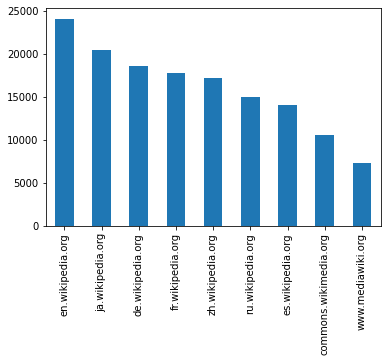

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
train.Sub_Page.value_counts().plot(kind='bar')

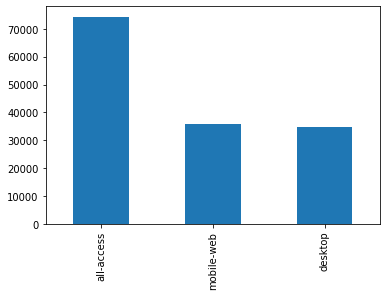

In [36]:
train.Access.value_counts().plot(kind='bar')

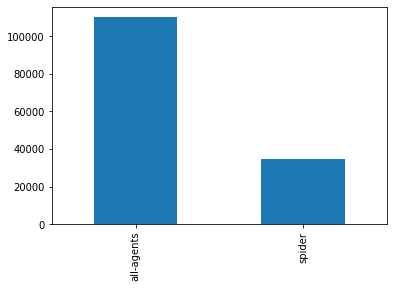

In [37]:
train.Agent.value_counts().plot(kind='bar')

In [38]:
train[train["Subject"]=="Google"].index.values

array([    65,   6478,  11309,  15237,  15909,  24196,  28027,  35165,
        40078,  45722,  49037,  53616,  60641,  67575,  70034,  75575,
        79700,  84805,  90908,  94496,  97609, 101367, 105189, 116654,
       118756, 123741, 129940, 132004, 139574, 142137])

In [39]:
train.Subject[39457]

'Twenty One Pilots'

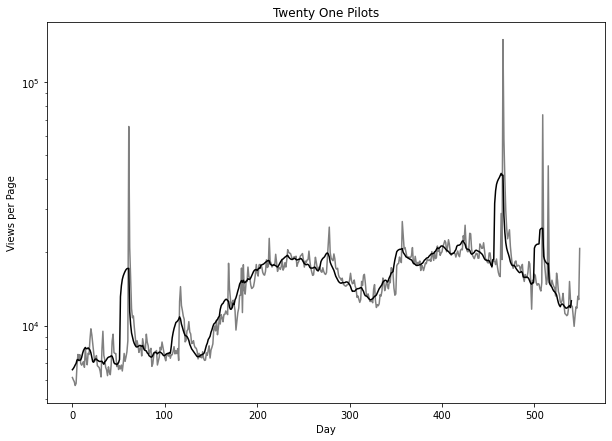

In [40]:
idx = 39457
window =10

data = train.iloc[idx,4:]
name = train.iloc[idx,0]
days = [r for r in range(data.shape[0])]

fig, ax = plt.subplots(figsize=(10, 7))

plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title(name)

ax.plot(days,data.values,color='grey')
ax.plot(np.convolve(data, np.ones((window,))/window, mode='valid'),color='black')



ax.set_yscale('log')

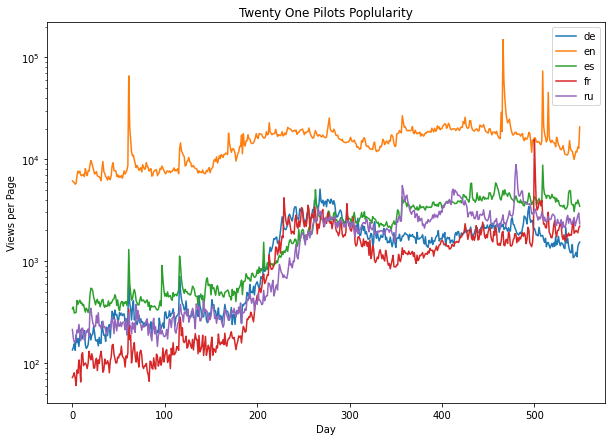

In [41]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Twenty One Pilots Poplularity')
ax.set_yscale('log')
handles = []
for country in ['de','en','es','fr','ru']:
    idx= np.where((train['Subject'] == 'Twenty One Pilots') 
                  & (train['Sub_Page'] == '{}.wikipedia.org'.format(country)) 
                  & (train['Access'] == 'all-access') & (train['Agent'] == 'all-agents'))
    idx=idx[0][0]
    
    data = train.iloc[idx,4:]
    handle = ax.plot(days,data.values,label=country)
    handles.append(handle)

ax.legend()

In [42]:
data1 = train.iloc[idx,4:]

In [43]:
split = len(data1) / 2

In [44]:
split

275.0

In [45]:
len(data1)

550

In [46]:
X1, X2 = data1[0:275], data1[275:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=542.327273, mean2=2837.534545
variance1=392065.724618, variance2=812034.636576


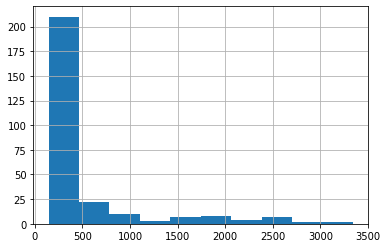

In [47]:
X1.hist()

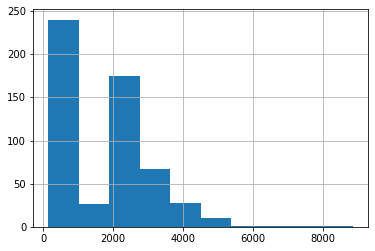

In [48]:
data1.hist()

In [49]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [50]:
result = adfuller(data1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.985002
p-value: 0.293188
Critical Values:
	1%: -3.442
	5%: -2.867
	10%: -2.570


In [51]:
data2 = pd.DataFrame(data=data1)

In [52]:
data2.columns


Int64Index([97689], dtype='int64')

In [53]:
data2['Date'] = data2.index


In [54]:
data3 = data2[['Date',97689]]

In [55]:
data3

,Date,97689
2015-07-01,2015-07-01,213
2015-07-02,2015-07-02,175
2015-07-03,2015-07-03,160
2015-07-04,2015-07-04,159
2015-07-05,2015-07-05,179
...,...,...
2016-12-27,2016-12-27,2374
2016-12-28,2016-12-28,2573
2016-12-29,2016-12-29,2787
2016-12-30,2016-12-30,2957


In [56]:
data3['Values'] = data3[97689]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
data3 = data3.drop([97689],axis=1)

In [58]:
data3.reindex()
data3

,Date,Values
2015-07-01,2015-07-01,213
2015-07-02,2015-07-02,175
2015-07-03,2015-07-03,160
2015-07-04,2015-07-04,159
2015-07-05,2015-07-05,179
...,...,...
2016-12-27,2016-12-27,2374
2016-12-28,2016-12-28,2573
2016-12-29,2016-12-29,2787
2016-12-30,2016-12-30,2957


In [59]:
# Convert your daily column from just string to DateTime (skip if already done)
data3['Date'] = pd.to_datetime(data3['Date'])
# Set the column 'Date' as index (skip if already done)
data3 = data3.set_index('Date')
# Specify datetime frequency
data3 = data3.asfreq('D')

In [60]:
data3

,Values
Date,
2015-07-01,213
2015-07-02,175
2015-07-03,160
2015-07-04,159
2015-07-05,179
...,...
2016-12-27,2374
2016-12-28,2573
2016-12-29,2787


In [61]:
data3 = data3.astype('float64')

In [62]:
data3.info()
data3.sort_index(inplace= True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2015-07-01 to 2016-12-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Values  550 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


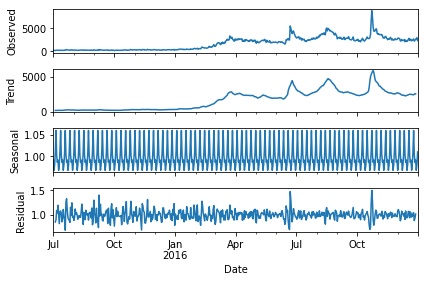

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data3, model='multiplicative')
trend    = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
fig = decomposition.plot()
plt.rcParams['figure.figsize'] = [9.0,5.0]

In [64]:
data3

,Values
Date,
2015-07-01,213.0
2015-07-02,175.0
2015-07-03,160.0
2015-07-04,159.0
2015-07-05,179.0
...,...
2016-12-27,2374.0
2016-12-28,2573.0
2016-12-29,2787.0


In [65]:
ffdata = train.iloc[:,4:]

In [66]:
from scipy.fftpack import fft

In [67]:
fft_complex = fft(ffdata)
fft_complex.shape

(145063, 550)

In [68]:
fft_mag = [np.sqrt(np.real(x)*np.real(x)+
                   np.imag(x)*np.imag(x)) for x in fft_complex]

arr = np.array(fft_mag)
fft_mean = np.mean(arr,axis=0)
fft_mean.shape
fft_xvals = [day / fft_mean.shape[0] for day in range(fft_mean.shape[0])]
npts = len(fft_xvals) // 2 + 1
fft_mean = fft_mean[:npts]
fft_xvals = fft_xvals[:npts]


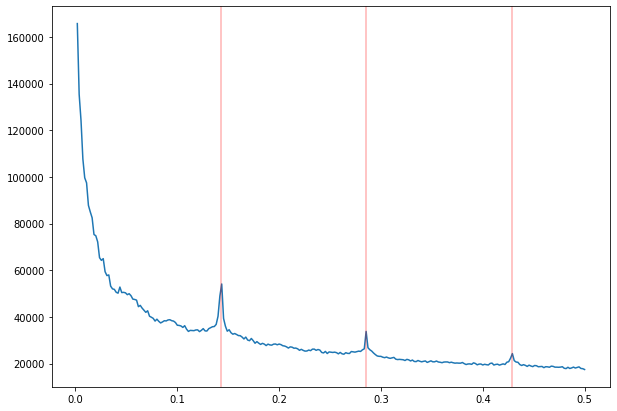

In [69]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(fft_xvals[1:],fft_mean[1:])
plt.axvline(x=1./7,color='red',alpha=0.3)
plt.axvline(x=2./7,color='red',alpha=0.3)
plt.axvline(x=3./7,color='red',alpha=0.3)

In [70]:
from pandas.plotting import autocorrelation_plot

Text(0.5, 1.0, 'Twenty One Pilots en.wikipedia.org')

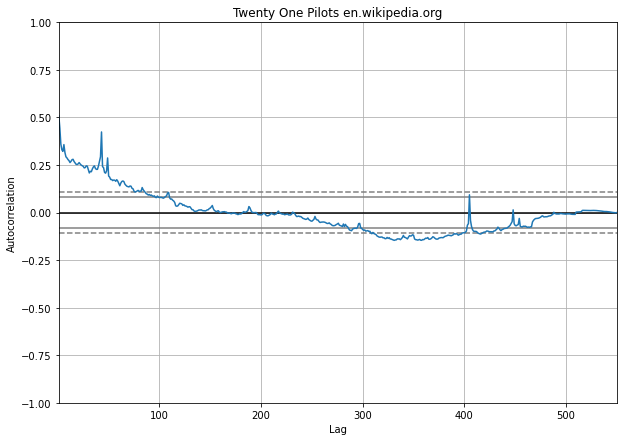

In [71]:
fig = plt.figure(figsize=(10, 7))
autocorrelation_plot(ffdata.iloc[39457])
plt.title(' '.join(train.loc[39457,['Subject', 'Sub_Page']]))

In [72]:
import warnings
warnings.filterwarnings("ignore")

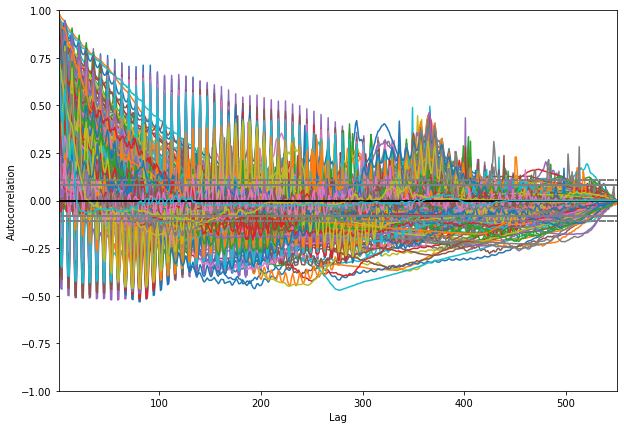

In [73]:
plt.figure(figsize=(10, 7))
a = np.random.choice(ffdata.shape[0],1000)
for i in a:
    autocorrelation_plot(ffdata.iloc[i])



In [74]:
ffdata.shape

(145063, 550)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
ffdata = train.iloc[:,4:]

In [77]:
X = ffdata.iloc[:,:500]
y = ffdata.iloc[:,500:]

In [78]:
X.shape

(145063, 500)

In [79]:
y.shape

(145063, 50)

In [80]:
X.values

array([[18., 11.,  5., ..., 41., 10., 21.],
       [11., 14., 15., ..., 54.,  5., 10.],
       [ 1.,  0.,  1., ...,  2.,  7.,  3.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [81]:
y.values

array([[13.,  8., 15., ..., 19., 18., 20.],
       [12., 11., 14., ..., 45., 26., 20.],
       [ 6.,  4.,  2., ...,  3.,  4., 17.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [82]:
X_train, X_val, y_train, y_val = train_test_split(X.values, y.values, 
                                                  test_size=0.1, 
                                                  random_state=42)

In [83]:
def mape(y_true,y_pred):
    eps = 1
    err = np.mean(np.abs((y_true - y_pred) / (y_true + eps))) * 100
    return err

In [84]:
lookback = 50
lb_data = X_train[:,-lookback:]
med = np.median(lb_data,axis=1,keepdims=True)
eps = 1
err = mape(y_train,med)

In [85]:
err

68.1061532742806

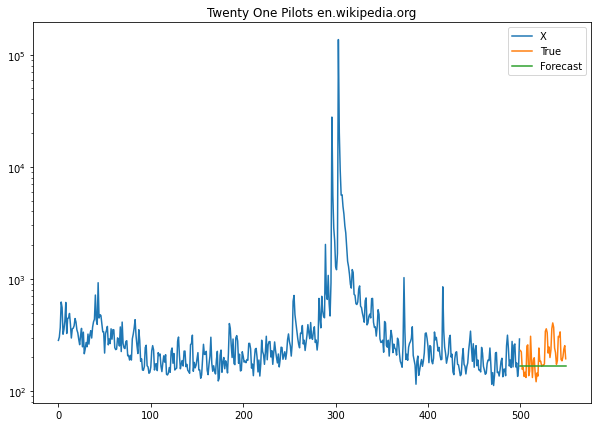

In [86]:
idx = 39457

fig, ax = plt.subplots(figsize=(10, 7))


ax.plot(np.arange(500),X_train[idx], label='X')
ax.plot(np.arange(500,550),y_train[idx],label='True')

ax.plot(np.arange(500,550),np.repeat(med[idx],50),label='Forecast')

plt.title(' '.join(train.loc[idx,['Subject', 'Sub_Page']]))
ax.legend()
ax.set_yscale('log')

In [115]:
from statsmodels.tsa.arima_model import ARIMA

In [120]:
model = ARIMA(X_train[0], order=(5,1,5))

In [121]:
model = model.fit()

In [122]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  499
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -3864.353
Method:                       css-mle   S.D. of innovations            554.901
Date:                Thu, 02 Sep 2021   AIC                           7752.705
Time:                        10:24:43   BIC                           7803.257
Sample:                             1   HQIC                          7772.543
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0501     15.544      0.196      0.845     -27.415      33.515
ar.L1.D.y     -0.0930      0.040     -2.335      0.020      -0.171      -0.015
ar.L2.D.y     -0.6624      0.033    -20.099      0.000      -0.727      -0.598
ar.L3.D.y     -0.5104      0.052     -9.780      0.000      -0.613      -0.408
ar.L4.D.y     -0.2225      0.032     -6.913      0.000      -0.286      -0.159
ar.L5.D.y     -0.8554      0.040    -21.494      0.000      -0.933      -0.777
ma.L1.D.y     -0.1237      0.052     -2.364      0.018      -0.226      -0.021
ma.L2.D.y      0.3654      0.044      8.278      0.000       0.279       0.452
ma.L3.D.y      0.4518      0.051      8.812      0.000       0.351       0.552
ma.L4.D.y     -0.2619      0.045     -5.789      0.000      -0.351      -0.173
ma.L5.D.y      0.6590      0.045     14.766      0.000       0.572       0.746
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6363           -0.7875j            1.0124           -0.1418
AR.2            0.6363           +0.7875j            1.0124            0.1418
AR.3           -1.0942           -0.0000j            1.0942           -0.5000
AR.4           -0.2192           -0.9971j            1.0210           -0.2844
AR.5           -0.2192           +0.9971j            1.0210            0.2844
MA.1           -1.0230           -0.0000j            1.0230           -0.5000
MA.2           -0.0932           -1.0750j            1.0790           -0.2638
MA.3           -0.0932           +1.0750j            1.0790            0.2638
MA.4            0.8034           -0.7927j            1.1287           -0.1239
MA.5            0.8034           +0.7927j            1.1287            0.1239
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'ARIMA residuals for 2NE1  pageviews')

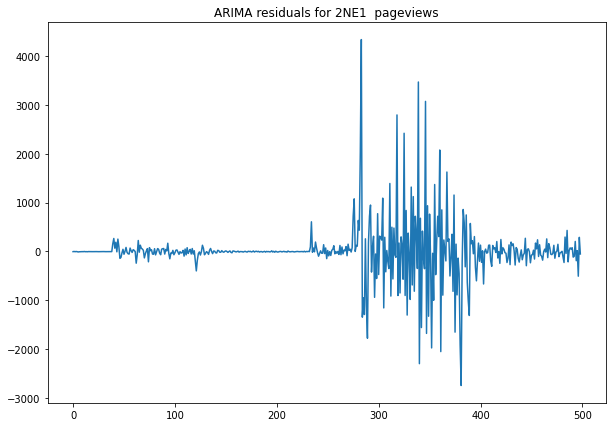

In [123]:
fig, ax = plt.subplots(figsize=(10, 7))
idx = 0
residuals = pd.DataFrame(model.resid)
ax.plot(residuals)

plt.title('ARIMA residuals for 2NE1  pageviews')

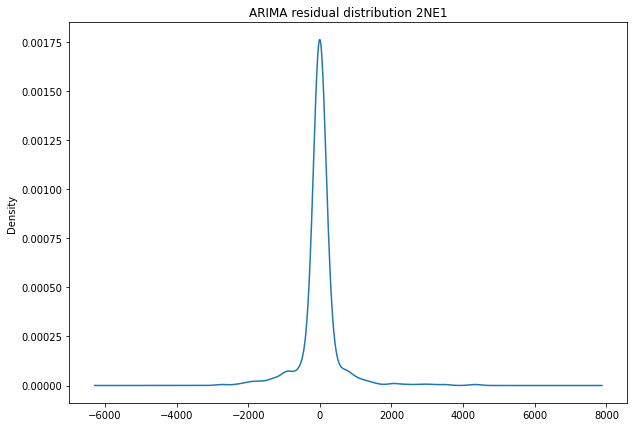

In [124]:
residuals.plot(kind='kde',
               figsize=(10,7),
               title='ARIMA residual distribution 2NE1', legend=False)

In [125]:
predictions, stderr, conf_int = model.forecast(50)

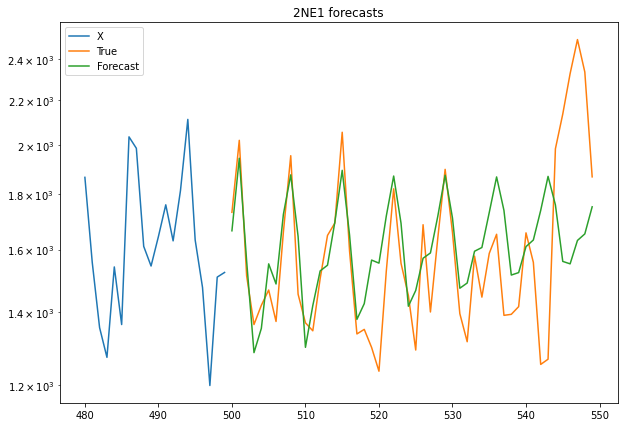

In [126]:
fig, ax = plt.subplots(figsize=(10, 7))


ax.plot(np.arange(480,500),X_train[0,480:], label='X')
ax.plot(np.arange(500,550),y_train[0],label='True')

ax.plot(np.arange(500,550),predictions,label='Forecast')


plt.title('2NE1 forecasts')
ax.legend()
ax.set_yscale('log')